# Introducción al paquete Mechanics

## Mecánica para Ingenieros. Grado en Ingeniería Civil. 

+ Alejandro E. Martínez Castro (Desarrollador principal, email:amcastro@ugr.es).
+ Rafael Muñoz Beltrán.
+ Germán Rodríguez Salido.
+ Gracia Rodríguez Jerónimo.
+ Juan José Granados Romera.

_Departamento de Mecánica de Estructuras e Ingeniería Hidráulica_

_Universidad de Granada_


<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />Este obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">licencia de Creative Commons Reconocimiento-NoComercial 4.0 Internacional</a>.

# Objetivos de este cuaderno

- Introducción al paquete Mechanics, para mecánica. 
- Sistemas de referencia.
- Producto escalar y vectorial simbólico. 
- Momento de un vector deslizante respecto de un punto, simbólico. 
- Derivación en ejes móviles. Regla de Boure.

# Mecánica con SymPy

SymPy es un paquete que sirve para realizar cálculo simbólico. Este tipo de paquetes son muy útiles en matemática aplicada, para generar y manipular expresiones que dependen de variables. Así como NumPy está centrado en las aplicaciones numéricas, SymPy está centrado en las simbólicas. 

El uso habitual de SymPy es siempre dentro de un cuaderno de Jupyter Notebook. 

Para Mecánica, existe un paquete, montado sobre SymPy, denominado 'mechanics'. 

_Tienes disponible la documentación de `mechanics` en http://docs.sympy.org/0.7.5/modules/physics/mechanics/index.html._

## Sistemas de referencia

En primer lugar vamos a manejar los sistemas de referencia. Podremos así expresar los vectores en unos u otros sistemas, y generar de forma sencilla las transformaciones de coordenadas entre ellos. 

En primer lugar, cargaremos el paquete SymPy. 

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.0 (Python 3.6.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


Para trabajar con sistemas de referencia, usaremos la clase `ReferenceFrame`, que está dentro del paquete de mecánica de SymPy, `sympy.physics.mechanics`. De esta forma podremos representar vectores, que es el objeto de estas primeras semanas del curso de Mecánica. 

Es interesante la referencia sobre vectores que figura en la documentación de SymPy

http://docs.sympy.org/0.7.5/modules/physics/vector/vectors.html

A continuación importaremos la clase `ReferenceFrame`, con la cual ya podemos empezar a representar vectores.

In [2]:
from sympy.physics.mechanics import ReferenceFrame

A continuación vamos a generar un sistema de referencia. Denominaremos "A" a este sistema, y para acceder a los vectores unitarios que lo definen, emplearemos 

    A.x, A.y, A.z
    
Para referirnos a los versores $\vec{i}$, $\vec{j}$, $\vec{k}$ del sistema de referencia "A".

In [3]:
A = ReferenceFrame("A")
A.x

Observamos que por defecto, la notación no es la que esperábamos. Desearíamos que en vez de $\mathbf{\hat{a}_x}$, este vector se denominase $\vec{i}$. Para esto, vamos a generar nuestra propia clase para los sistemas de referencia.


In [4]:
# Definimos nuestra propia clase para que los versores sean IJK
class IJKReferenceFrame(ReferenceFrame):
    def __init__(self, name=""):
        super(IJKReferenceFrame,self).__init__(name, latexs=['\overrightarrow{%s}_{%s}' % (idx, name) for idx in ("i", "j", "k")])
        self.i = self.x
        self.j = self.y
        self.k = self.z

A continuación vamos a generar un sistema de referencia, denominado "A" (y reasignaremos el de antes), y vamos a representar el vector $\vec{i} + \vec{j} + \vec{k}$

In [5]:
A = IJKReferenceFrame()
A.i + A.j + A.k

Practiquemos con la definición de un vector. Vamos a representar ahora el vector $(2,3,5)$ en la base anterior

In [6]:
2*A.i + 3*A.j + 5*A.k

Si queremos incorporar algún símbolo alusivo al sistema de referencia, nos basta con incorporarlo en la definición del sistema. Por ejemplo, generemos dos sistemas de referencia, y utilicemos los símbolos "1" y "2" para diferenciarlos en la representación.

In [7]:
B = IJKReferenceFrame("1")
C = IJKReferenceFrame("2")
B.i + B.j + B.k

In [8]:
C.i + 2 * C.k

Cualquier vector admite ser asignado a una variable

In [9]:
r1 = A.i + 3*A.j -2*A.k

In [10]:
r1

### Álgebra vectorial

Podemos trabajar también con símbolos, y podemos realizar las operaciones de producto escalar y producto vectorial con ellos.

In [11]:
R, V = symbols('R, V', positive=True) # Le decimos a Python que son símbolos
r1 = R * (A.x + A.y + A.z)
v1 = V * (A.x - 2 * A.z)

In [12]:
r1

In [13]:
from sympy.physics.mechanics import dot, cross # Para realizar producto escalar y vectorial

### Producto escalar
Hay tres formas de definir el producto escalar en este paquete (ojo, la notación es exclusiva para variables generadas dentro de SymPy

In [14]:
r1.dot(v1)
dot(r1, v1)
r1 & v1

In [15]:
v1

In [16]:
v1 & v1

In [17]:
v1.dot(v1)

### Producto vectorial
Hay, igualmente, tres formas de definir el producto vectorial

In [18]:
r1.cross(v1)
cross(r1, v1)
r1 ^ v1

Observe que el producto vectorial de uno de estos vectores por sí mismo es nulo

In [19]:
v1 ^ v1

### Módulo y normalización de vectores
Podemos hallar también la norma de los vectores con su método `magnitude` e incluso normalizarlos con `normalize`:

In [20]:
(r1 ^ v1).magnitude()

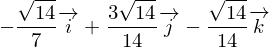

In [21]:
(r1 ^ v1).normalize()

### Ejercicio: Momento de un sistema de vectores deslizantes

(Ejercicio 5 de la relación de problemas) 

Dado el sistema de vectores deslizantes: 

\begin{align}
A_1 = (1,0,0),\,\,\,\,\,\vec{v}_1 = (1,0,0) \nonumber \\
A_2 = (1,1,1),\,\,\,\,\,\vec{v}_2 = (0,1,0) \nonumber \\
A_3 = (1,0,1),\,\,\,\,\,\vec{v}_3 = (0,0,1) \nonumber
\end{align}

Determinar: 
- Resultante y vector unitario en la dirección de la resultante.
- Momento del sistema en el origen de coordenadas, e invariante escalar.


In [22]:
A1 = A.i
A2 = A.i + A.j + A.k
A3 = A.x + A.z
v1 = A.i
v2 = A.j
v3 = A.k
resultante = v1+v2+v3
momento = (A1 ^ v1) + (A2 ^ v2) + (A3 ^ v3) # Atención, los paréntesis son fundamentales aquí

In [23]:
resultante

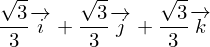

In [24]:
resultante.normalize()

In [25]:
momento

In [26]:
invariante_escalar = resultante & momento
invariante_escalar

### Ejercicio: Aplicación de la regla de Boure

Usando directamente la fórmula para la derivada en ejes móviles:

$$\left(\frac{\operatorname{d}\!\mathbf{a}}{\operatorname{d}\!t}\right) = \left(\frac{\operatorname{d}\!\mathbf{a}}{\operatorname{d}\!t}\right)_m + \mathbf{\omega}\! \times \mathbf{a}$$

Calcula la derivada del vector de posición $R \mathbf{i}_m$, siendo $A_m$ un sistema de referencia móvil, que gira respecto al inercial $A$ con velocidad angular $\mathbf{\omega}=\Omega \mathbf{k}_m$. **¿Cuál es el módulo de la derivada?**

In [27]:
R, Omega = symbols('R, Omega', positive=True)
Am = IJKReferenceFrame("m") #Sistema de referencia móvil

In [28]:
a = R * Am.i
a

In [29]:
omega = Omega * Am.k #Vector expresado en ejes móviles
omega

In [30]:
da = omega ^ a # No se ha incluido la derivada de R, pues éste no varía con el tiempo. 
da

In [31]:
da.magnitude()

### Ejercicio: 

Considere el mismo caso que el anterior, pero suponga ahora que el vector de posición de un punto material viene dado, en el sistema móvil $A_m$ por: 

$$\vec{R}(t)_m = r(t)\, \vec{i}_m$$

Calcula la derivada del vector de posición $\mathbf{R(t)}_m$.

En mecánica, el tiempo es un parámetro muy habitual. Por esto, se incluye un procedimiento para definir variables que dependen del tiempo. 

    dynamicsymbols

In [32]:
from sympy.physics.mechanics import dynamicsymbols
r = dynamicsymbols('r')
t = symbols('t')
r

La derivada temporal puede obtenerse con la función `diff`

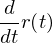

In [33]:
r.diff()

A continuación generaremos el vector $\vec{a} = r(t) \,\vec{i_m}$. Puesto que $r$ es un símbolo dinámico, Python interpretará directamente que varía con el tiempo, aunque puede no mostrar $r(t)$ expresamente.

In [34]:
a =  r * Am.i
a

La derivada respecto del tiempo del vector anterior se realiza con la función `diff`. Nótese que a esta función debe dársele, para actuar sobre un vector, el escalar respecto del cual se deriva (el tiempo $t$ en este caso) y el sistema de referencia. 

In [35]:
da = a.diff(t,Am)
da

Observe que la derivada ha sido ahora indicada mediante una notación muy empleada en Mecánica Clásica: las derivadas respecto del tempo se notan con un "punto" encima de la variable. 

Finalmente, podremos calcular la derivada, aplicando nuevamente la regla de Boure. 

In [36]:
da = a.diff(t,Am) + (omega ^ a)
da